In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# General settings
figure_path = "./figures/main/"

# Load label error indices from Northcutt et al. (https://arxiv.org/abs/2103.14749)
# Image identifiers taken from: taken from: https://github.com/cleanlab/cleanlab/blob/master/examples/imagenet/imagenet_val_label_error_indices/imagenet_val_label_errors_unique_id_only.txt
label_error = np.load("imagenet_val_ident.npy", allow_pickle=True)[:, 2].astype(np.int)
error_inds = np.where(label_error == 1)
right_inds = np.where(label_error == 0)

## Figure 2 (a)

In [3]:
# Set base network and conditions
base_network = "Res18"
folder_name = f"./results/{base_network}/"

conditions = [f"{base_network}_Base_condition",
              f"{base_network}_Plus_1ep",
              f"{base_network}_Plus_10ep",
              f"{base_network}_Different_optimizer",
              f"{base_network}_Different_batchsize",
              f"{base_network}_Different_initialisation",
              f"{base_network}_Different_LR",
              f"{base_network}_CUDA_nondeterministic",
              f"{base_network}_Different_dataorder",
              f"{base_network}_Different_architecture",
              f"{base_network}_Different_data",
              f"{base_network}_Half_data",
              f"{base_network}_Combined_condition"]

# Load array (check "01_build_arrays.ipynb" to see how arrays are built)
# Array contains: mean over whether the decisions of the different models were correct 
# Array has shape: (50000, 91) (num_items, num_epochs)
mean_decisions_correct = np.load(folder_name + f"{base_network}_mean_decisions_correct.npy")

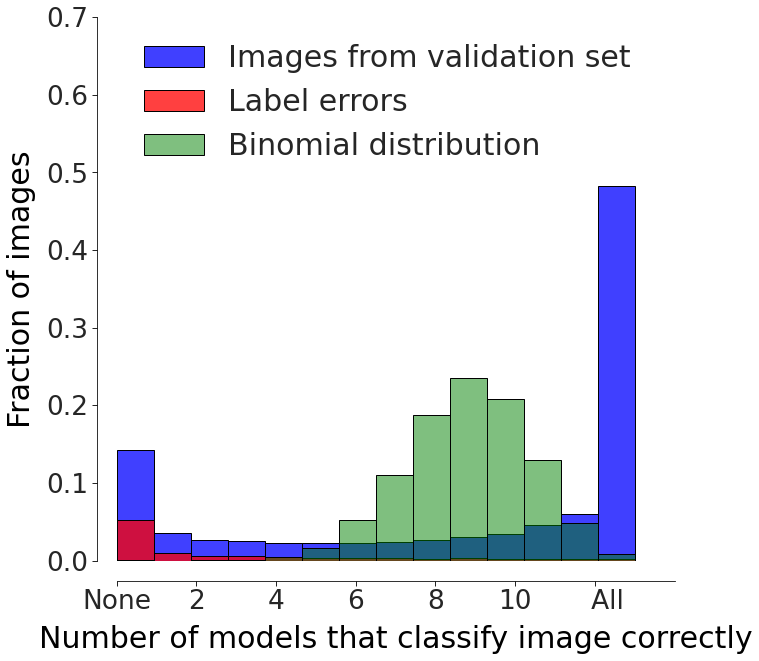

In [4]:
# Set epoch for which to make histogram
ep = 90
num_models = len(conditions)

# Make mean decisions correct with binomial observer figure
from numpy.random import default_rng
np.random.seed(1312)
rng = default_rng()
s = rng.binomial(num_models, np.mean(mean_decisions_correct[:, ep]), mean_decisions_correct.shape[0])

# Init histogram figure
plt.figure(figsize=(10,10))
sns.histplot(data=mean_decisions_correct[:, ep] * num_models, bins=num_models+1, 
             color= 'blue', label='Images from validation set', stat="probability")
    
# Plot wronly labelled images
# In order for them to have the right scale, we add the missing 45000 images at location -11
# Somehow, this slightly messes up the alignment of the bins
mean_decisions_correct_errors = mean_decisions_correct[error_inds, :].squeeze() * num_models
sns.histplot(data=np.concatenate((np.negative(np.ones(45000) * (num_models)), mean_decisions_correct_errors[:, ep])), 
             bins=num_models*2+2, color='red', label='Label errors', stat="probability")

# Adding one zero to the binomial histogram ensures that it has the same bins as the other histogram
sns.histplot(data=np.concatenate((np.zeros(1), s)), alpha=0.5, bins=num_models+1, 
             color='green', label='Binomial distribution', stat="probability")

# Plot settings
sns.set_context("paper", font_scale=3.0)
sns.set_style("white")
sns.color_palette("viridis", as_cmap=True)
sns.despine(right=True, top=True, offset=20, trim=False)
plt.xlabel("Number of models that classify image correctly", fontsize=30, labelpad=10)
plt.ylabel("Fraction of images", fontsize=30, labelpad=10)
plt.xticks(np.arange(0, num_models+1, step=2), ["None", "2", "4", "6", "8", "10", "   All"])
plt.ylim(0,0.7)
plt.xlim(0,num_models+1)

if base_network == "Res18":
    plt.legend(loc="upper left", fontsize=30, frameon=False)
plt.savefig(figure_path + 'figure_2_a.png', dpi=300, bbox_inches='tight')

## Figure 2 (b)

In [5]:
# Set base network and conditions
base_network = "Rebuttal"
folder_name = "./results/Rebuttal/"
conditions = os.listdir(folder_name)

# Filter .npy arrays from conditions list
conditions = [f for f in conditions if '.npy' not in f]

# Load array (check "01_build_arrays.ipynb" to see how arrays are built)
# Array contains: mean over whether the decisions of the different models were correct 
# Array has shape: (50000, 1) (num_items, num_epochs)
mean_decisions_correct = np.load(folder_name + f"{base_network}_mean_decisions_correct.npy")

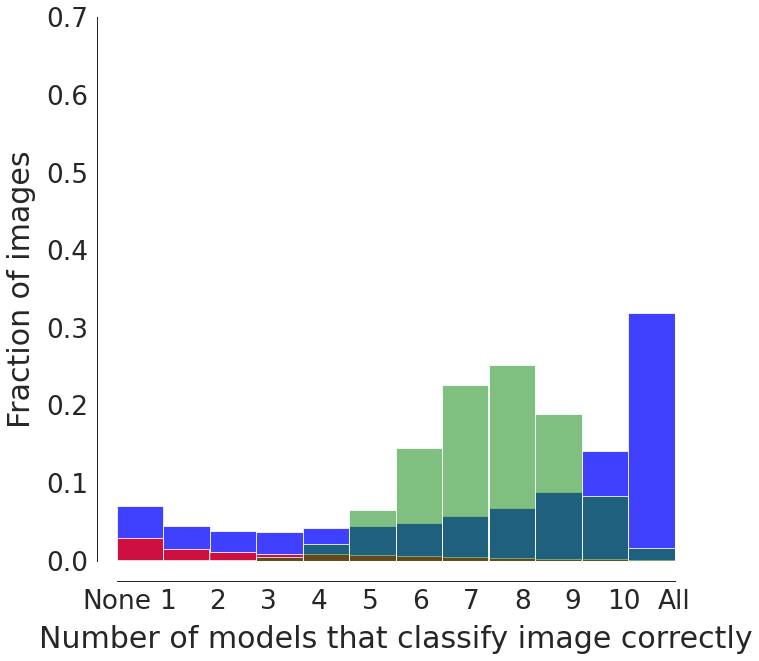

In [6]:
# Set epoch for which to make histogram
ep = 0
num_models = len(conditions)

# Make mean decisions correct with binomial observer figure
from numpy.random import default_rng
np.random.seed(1312)
rng = default_rng()
s = rng.binomial(num_models, np.mean(mean_decisions_correct[:, ep]), mean_decisions_correct.shape[0])

# Init histogram figure
plt.figure(figsize=(10,10))
sns.histplot(data=mean_decisions_correct[:, ep] * num_models, bins=num_models+1, 
             color= 'blue', label='Images from validation set', stat="probability")
    
# Plot wronly labelled images
# In order for them to have the right scale, we add the missing 45000 images at location -11
# Somehow, this slightly messes up the alignment of the bins
mean_decisions_correct_errors = mean_decisions_correct[error_inds].squeeze() * num_models
sns.histplot(data=np.concatenate((np.negative(np.ones(45000) * (num_models)),mean_decisions_correct_errors)), 
             bins=num_models*2+2, color='red', label='Label errors', stat="probability")

# Adding one zero to the binomial histogram ensures that it has the same bins as the other histogram
sns.histplot(data=np.concatenate((np.zeros(1), s)), alpha=0.5, bins=num_models+1, 
             color='green', label='Binomial distribution', stat="probability")

# Plot settings
sns.set_context("paper", font_scale=3.0)
sns.set_style("white")
sns.color_palette("viridis", as_cmap=True)
sns.despine(right=True, top=True, offset=20, trim=False)
plt.xlabel("Number of models that classify image correctly", fontsize=30, labelpad=10)
plt.ylabel("Fraction of images", fontsize=30, labelpad=10)
labels = ["None", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "All"]
plt.xticks(np.arange(0, num_models+1, step=1), labels)
plt.ylim(0,0.7)
plt.xlim(0,num_models)

# Save figure
plt.savefig(figure_path + 'figure_2_b.png', dpi=300, bbox_inches='tight')